In [37]:
import pandas as pd;
import numpy as np;
import os
import requests
import bs4 as bs
import nltk
import re
import time
import sys
import logging
import multiprocessing;
from wordcloud import WordCloud, ImageColorGenerator
from itertools import cycle;
import json

from gensim.models import word2vec;


from nltk.corpus import words, stopwords
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize, sent_tokenize, pos_tag
#from gensim import corpora
import spacy
#spacy.load('en')
from spacy.lang.en import English

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KDTree;

import pyLDAvis.gensim
import warnings
import pickle
import gensim
from nltk.corpus import wordnet as wn
from gensim import corpora

import matplotlib.pyplot as plt

from gensim.models import Word2Vec 

warnings.filterwarnings('ignore')

In [38]:
folder_name = '/Users/michael/Downloads/cleaned_SEC/'
file_names = os.listdir(folder_name)

In [39]:
filings_for_kmeans = []
for file_name in file_names:
    file_loc = folder_name + file_name
    try:
        file = eval(open(file_loc).read())
        extended_file = " "
        for word,qty in file.items():
            if len(word) < 14:
                for i in range(qty):
                    extended_file = extended_file + " " + word
        filings_for_kmeans.append(extended_file)
    except:
        count = count + 1
        print(file_name)

.DS_Store
cubesmart_10-Q


In [44]:
tfidf = TfidfVectorizer()
tfidf_model = tfidf.fit_transform(filings_for_kmeans)

#tfidf_model.shape

type(tfidf_model)

scipy.sparse.csr.csr_matrix

# Elbow Method

1
2
3
4
5
6
7
8
9
10
11
12
13
14


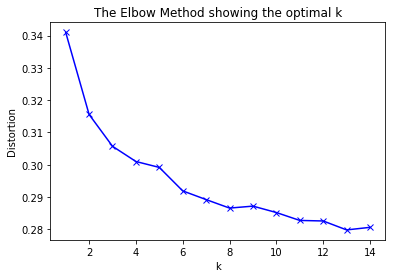

In [47]:
from scipy.spatial.distance import cdist

colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

X = tfidf_model.toarray()

# k means determine k
distortions = []
K = range(1,15)
for k in K:
    print(k)
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()



# Plotting KMeans

In [ ]:
kmeans4 = KMeans(n_clusters=4).fit_predict(tfidf_model)
PCA4 = PCA(n_components=2).fit_transform(tfidf_model.todense())

kmeans2 = KMeans(n_clusters=2).fit_predict(tfidf_model)
PCA2 = PCA(n_components=2).fit_transform(tfidf_model.todense())

In [ ]:
colors = ['orange', 'black', 'green', 'blue', 'yellow', 'red', 'purple', 'light_blue']

fig, ax = plt.subplots(1,2, figsize=(16,8))
for cls, col in enumerate(colors[:4]):
    cls2 = PCA2[kmeans2 == cls]
    cls4 = PCA4[kmeans4 == cls]
    ax[0].scatter(cls2[:,0], cls2[:,1], color=col)
    ax[1].scatter(cls4[:,0], cls4[:,1], color=col)
ax[0].set_title("2 Clusters")
ax[1].set_title("4 Clusters")

In [49]:
kmeans6 = KMeans(n_clusters=6).fit_predict(tfidf_model)
PCA6 = PCA(n_components=2).fit_transform(tfidf_model.todense())

kmeans8 = KMeans(n_clusters=8).fit_predict(tfidf_model)
PCA8 = PCA(n_components=2).fit_transform(tfidf_model.todense())

Text(0.5, 1.0, '8 Clusters')

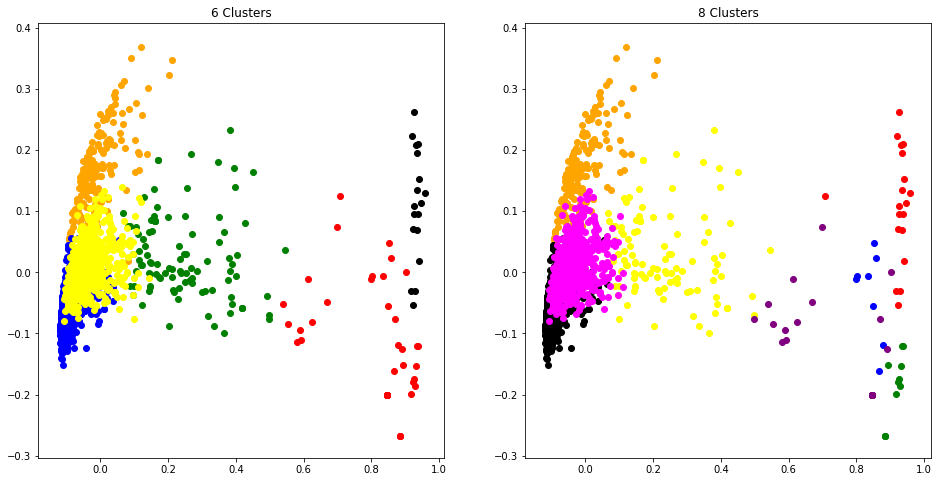

In [52]:
colors = ['orange', 'black', 'green', 'blue', 'yellow', 'red', 'purple', 'magenta']

fig, ax = plt.subplots(1,2, figsize=(16,8))
for cls, col in enumerate(colors[:16]):
    cls6 = PCA6[kmeans6 == cls]
    cls8 = PCA8[kmeans8 == cls]
    ax[0].scatter(cls6[:,0], cls6[:,1], color=col)
    ax[1].scatter(cls8[:,0], cls8[:,1], color=col)
ax[0].set_title("6 Clusters")
ax[1].set_title("8 Clusters")

In [7]:
kmeans12 = KMeans(n_clusters=12).fit_predict(tfidf_model)
PCA12 = PCA(n_components=2).fit_transform(tfidf_model.todense())

kmeans16 = KMeans(n_clusters=16).fit_predict(tfidf_model)
PCA16 = PCA(n_components=2).fit_transform(tfidf_model.todense())

Text(0.5, 1.0, '16 Clusters')

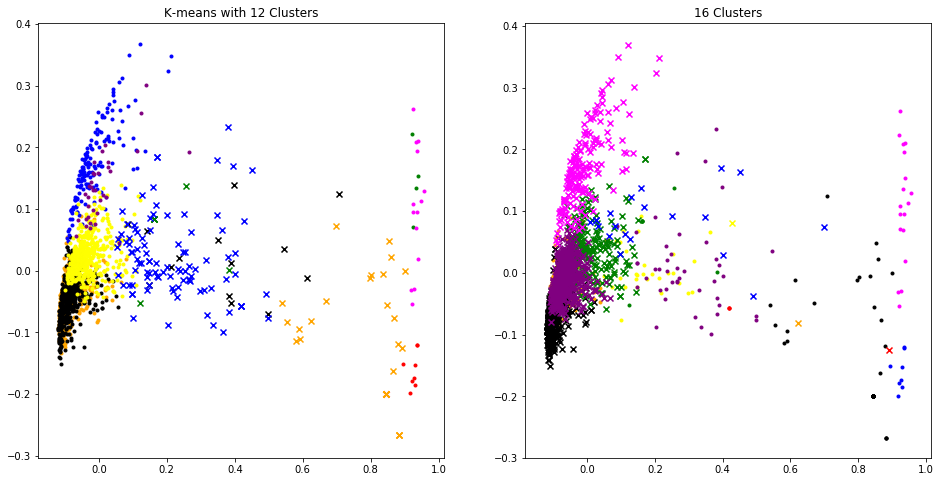

In [8]:
colors = ['orange', 'black', 'green', 'blue', 'yellow', 'red', 'purple', 'magenta',
         'orange', 'black', 'green', 'blue', 'yellow', 'red', 'purple', 'magenta']

fig, ax = plt.subplots(1,2, figsize=(16,8))
count = 0
for cls, col in enumerate(colors[:16]):
    if count < 8:
        marker_ = "."
    else:
        marker_ = "x"
        
    cls12 = PCA12[kmeans12 == cls]
    cls16 = PCA16[kmeans16 == cls]
    ax[0].scatter(cls12[:,0], cls12[:,1], color=col, marker = marker_)
    ax[1].scatter(cls16[:,0], cls16[:,1], color=col, marker = marker_)
    count = count + 1
ax[0].set_title("K-means with 12 Clusters")
ax[1].set_title("16 Clusters")

In [9]:
fig.savefig('/Users/michael/Downloads/12_clusters')

# Cosine Similarity

In [53]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
def get_cosine_sim(*strs): 
    vectors = [t for t in get_vectors(*strs)]
    return cosine_similarity(vectors)
    
def get_vectors(*strs):
    text = [t for t in strs]
    vectorizer = CountVectorizer(text)
    vectorizer.fit(text)
    return vectorizer.transform(text).toarray()

In [64]:
get_cosine_sim(filings_for_kmeans[0],filings_for_kmeans[1])

array([[1.        , 0.98618074],
       [0.98618074, 1.        ]])

In [79]:
get_cosine_sim(filings_for_kmeans[0],filings_for_kmeans[2])[0][1]

0.9098918010955259

In [59]:
print(len(file_names), len(filings_for_kmeans))
print(file_names.index('.DS_Store'),file_names.index('cubesmart_10-Q'))

1644 1642
562 1643


In [68]:
def find_real_index(file_name_index):
    if file_name_index <= 562:
        return file_name_index
    if file_name_index <= 1643:
        return file_name_index - 1
    else:
        return file_name_index - 2

So, if we're finding a filename > 562, subtract 1. > 1643, subtract 2.

In [92]:
def avg_cos(main_index,other_index):
    global filings_for_kmeans
    cosine_sims = []
    for index in other_index:
        cosine_sims.append( get_cosine_sim(filings_for_kmeans[main_index],filings_for_kmeans[index])[0][1]  )
    
    return np.mean(cosine_sims)


def avg_cos_sim_from_file_names(main_file_name,other_file_name):
    global file_names
    main_index = find_real_index( file_names.index(main_file_name) )
    other_index = []
    for file_name in other_file_name:
        index = find_real_index( file_names.index( file_name) )
        other_index.append(index)
    
    return avg_cos(main_index,other_index)
    

In [91]:
avg_cos(0,[1,2,3,4,5])

0.9675264735747298